In [121]:
# Import necessary libraries for data handling, preprocessing, and modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import joblib
import os

# Data Preprocessing

In [122]:
# Load the training dataset from a CSV file
df = pd.read_csv(r'c:\Users\lalup\Downloads\Datasets_final\train_dataset_final1.csv')

# Display the first 5 rows to inspect the data
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [123]:
# Print data types of each column to understand the structure
print(df.dtypes)

# Print the shape of the dataset (rows, columns)
print(df.shape)

Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                   float64
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object
(25247, 27)


In [124]:
# Check for missing values in each column
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [125]:
# Drop rows with missing values to ensure clean data
df.dropna(inplace=True)

In [126]:
# Confirm no missing values remain and check the updated shape
print(df.isnull().sum())
print(df.shape)

Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64
(25121, 27)


In [127]:
# Remove the 'Customer_ID' column as it’s not a feature for modeling
df.drop(columns=['Customer_ID'], inplace=True)

In [128]:
# Get the list of remaining columns for reference
clms = df.columns.to_list()
clms

['marriage',
 'sex',
 'education',
 'LIMIT_BAL',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'Bill_amt1',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'AVG_Bill_amt',
 'PAY_TO_BILL_ratio',
 'next_month_default']

In [129]:
# Print unique values for each column to understand the data distribution
for col in clms:
    print(f"{col}-->{df[col].unique()}")

marriage-->[2 1 3 0]
sex-->[0 1]
education-->[2 1 3 4 5 6 0]
LIMIT_BAL-->[  60000  290000  180000  210000  280000   80000  200000   50000  130000
   30000  100000  250000   70000  160000  270000  240000  120000  320000
   20000  230000  350000  420000  150000   10000  260000  340000  360000
  390000  500000  140000   40000   90000  380000  110000  470000  220000
  460000  300000  570000  410000  330000  400000  310000  170000  190000
  450000  780000  440000  490000  610000  480000  530000  520000  740000
  370000  430000  630000  620000  700000  510000  720000  730000  660000
  600000  550000  760000  580000  800000   16000  640000  560000  540000
  670000  710000  590000 1000000  650000  750000  680000  690000]
age-->[25. 24. 63. 43. 32. 35. 37. 44. 34. 40. 59. 29. 30. 33. 47. 58. 68. 55.
 38. 22. 50. 41. 36. 57. 26. 53. 49. 31. 42. 45. 39. 28. 27. 48. 52. 46.
 54. 51. 23. 69. 21. 79. 70. 61. 60. 62. 56. 67. 64. 66. 71. 65. 75. 74.
 72. 73.]
pay_0-->[ 2  0 -2 -1  1  8  4  3  5  6  7]

In [130]:

"""
wrong entries 
marriage-->0
education-->5,6,0
"""


'\nwrong entries \nmarriage-->0\neducation-->5,6,0\n'

In [131]:
# remove the wrong enrties in marriage column and check that it removed or not
df = df[df['marriage']!=0]
df['marriage'].unique()

array([2, 1, 3], dtype=int64)

In [132]:
# fill the wrong entry with forward fill method 
df['education'] = df['education'].replace([5,6,0],pd.NA)
df['education'] =df['education'].ffill()
df['education'].unique()

C:\Users\lalup\AppData\Local\Temp\ipykernel_7304\1482469392.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] =df['education'].ffill()


array([2, 1, 3, 4], dtype=int64)

# EDA

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

TARGET_COL = 'next_month_default'

In [134]:
# Check for data types and missing values
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 25068 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25068 non-null  int64  
 1   sex                 25068 non-null  int64  
 2   education           25068 non-null  int64  
 3   LIMIT_BAL           25068 non-null  int64  
 4   age                 25068 non-null  float64
 5   pay_0               25068 non-null  int64  
 6   pay_2               25068 non-null  int64  
 7   pay_3               25068 non-null  int64  
 8   pay_4               25068 non-null  int64  
 9   pay_5               25068 non-null  int64  
 10  pay_6               25068 non-null  int64  
 11  Bill_amt1           25068 non-null  float64
 12  Bill_amt2           25068 non-null  float64
 13  Bill_amt3           25068 non-null  float64
 14  Bill_amt4           25068 non-null  float64
 15  Bill_amt5           25068

In [135]:
# Get descriptive statistics for all numerical columns
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,...,25068.000000,25068.000000,2.506800e+04,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000,25068.000000
mean,1.555050,0.604476,1.811632,168427.955960,35.431626,-0.042843,-0.159686,-0.190442,-0.240586,-0.282073,...,38874.143531,5715.442775,6.056530e+03,5280.270331,4874.759292,4903.144626,5262.062241,44947.440230,0.361981,0.190681
std,0.518191,0.488973,0.712307,129939.744543,9.174557,1.098819,1.173737,1.172429,1.147203,1.114473,...,59243.951436,16813.305660,2.406414e+04,17769.749508,16022.334896,15782.191248,17910.350402,62925.151223,5.063575,0.392846
min,1.000000,0.000000,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1245.160000,999.990000,9.294825e+02,399.897500,300.160000,258.730000,133.942500,4861.122500,0.040000,0.000000
50%,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17133.895000,2149.930000,2.030945e+03,1842.065000,1500.105000,1511.300000,1500.040000,21130.335000,0.090000,0.000000
75%,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49276.565000,5034.015000,5.000210e+03,4606.435000,4021.510000,4099.992500,4020.495000,57271.955000,0.590000,0.000000
max,3.000000,1.000000,4.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [136]:
# 1. Count the occurrences of each class
class_counts = df[TARGET_COL].value_counts()
print("Target class distribution:")
print(class_counts)


Target class distribution:
next_month_default
0    20288
1     4780
Name: count, dtype: int64


In [137]:
#2 Calculate and print the percentage
class_percentage = df[TARGET_COL].value_counts(normalize=True) * 100
print("\nTarget class percentage:")
print(class_percentage)



Target class percentage:
next_month_default
0    80.931865
1    19.068135
Name: proportion, dtype: float64


C:\Users\lalup\AppData\Local\Temp\ipykernel_7304\3917307010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET_COL, data=df, palette='viridis')


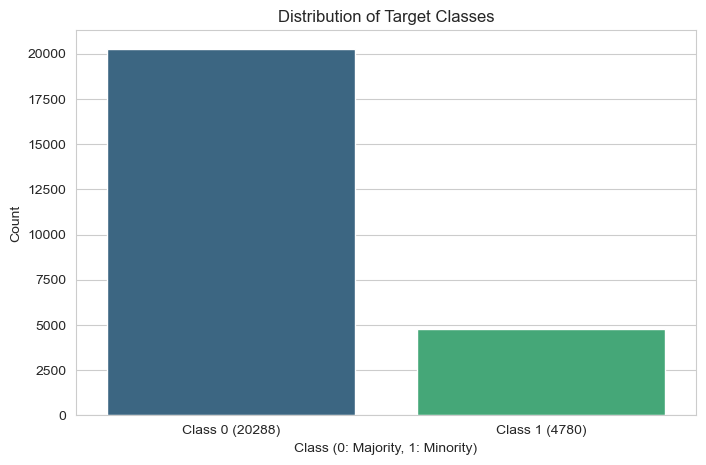

In [138]:
# 3. Visualize the imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x=TARGET_COL, data=df, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Class (0: Majority, 1: Minority)')
plt.ylabel('Count')
plt.xticks([0, 1], [f'Class 0 ({class_counts[0]})', f'Class 1 ({class_counts[1]})'])
plt.show()

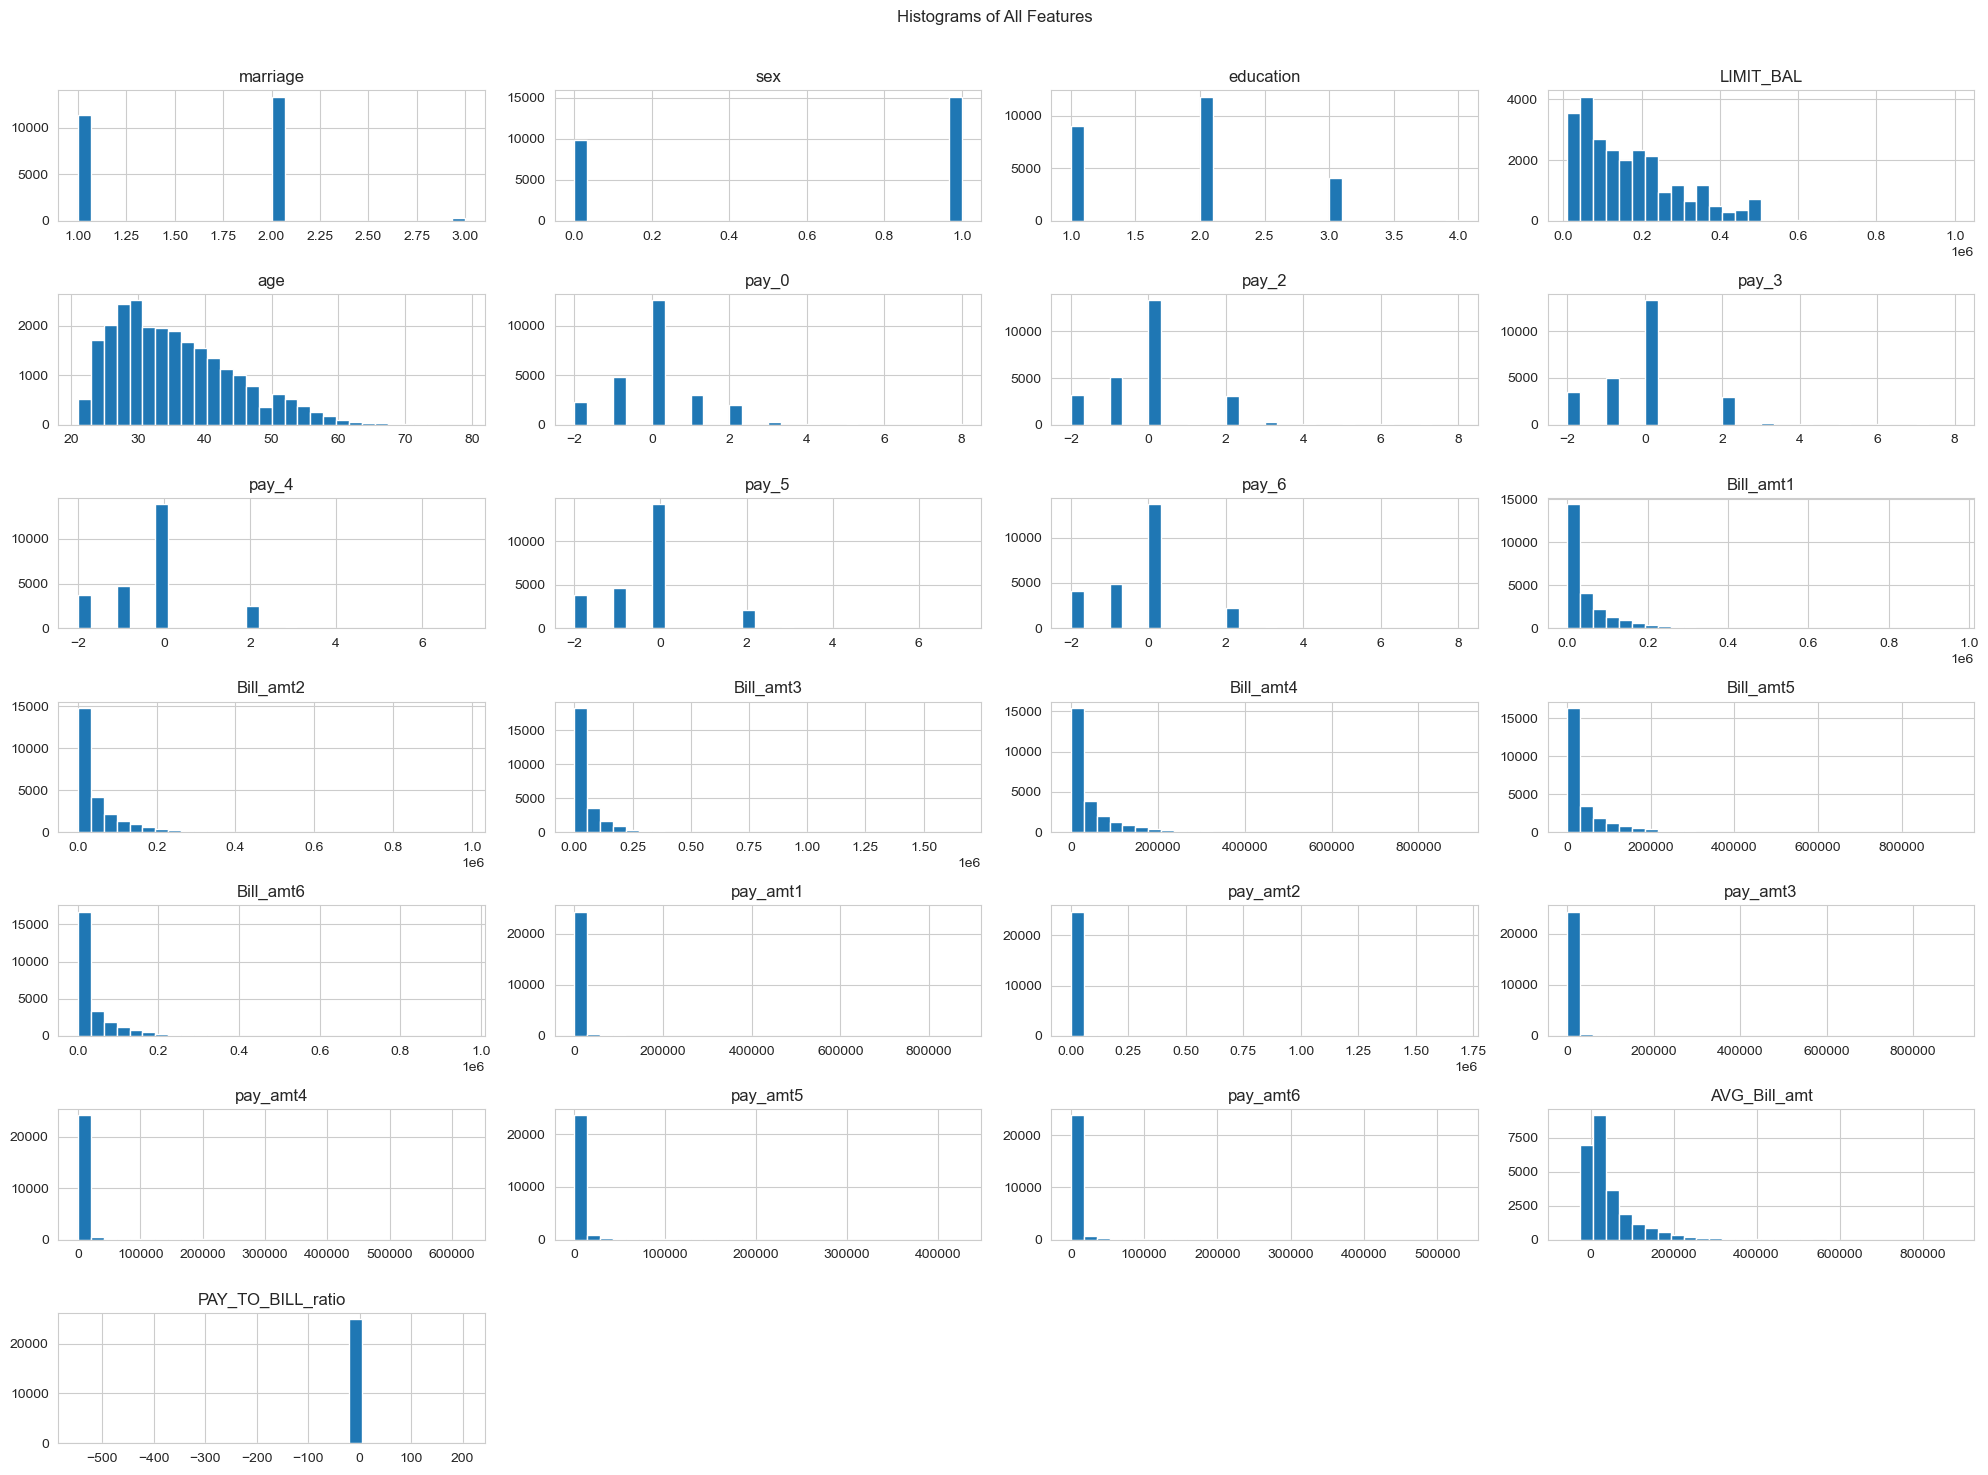

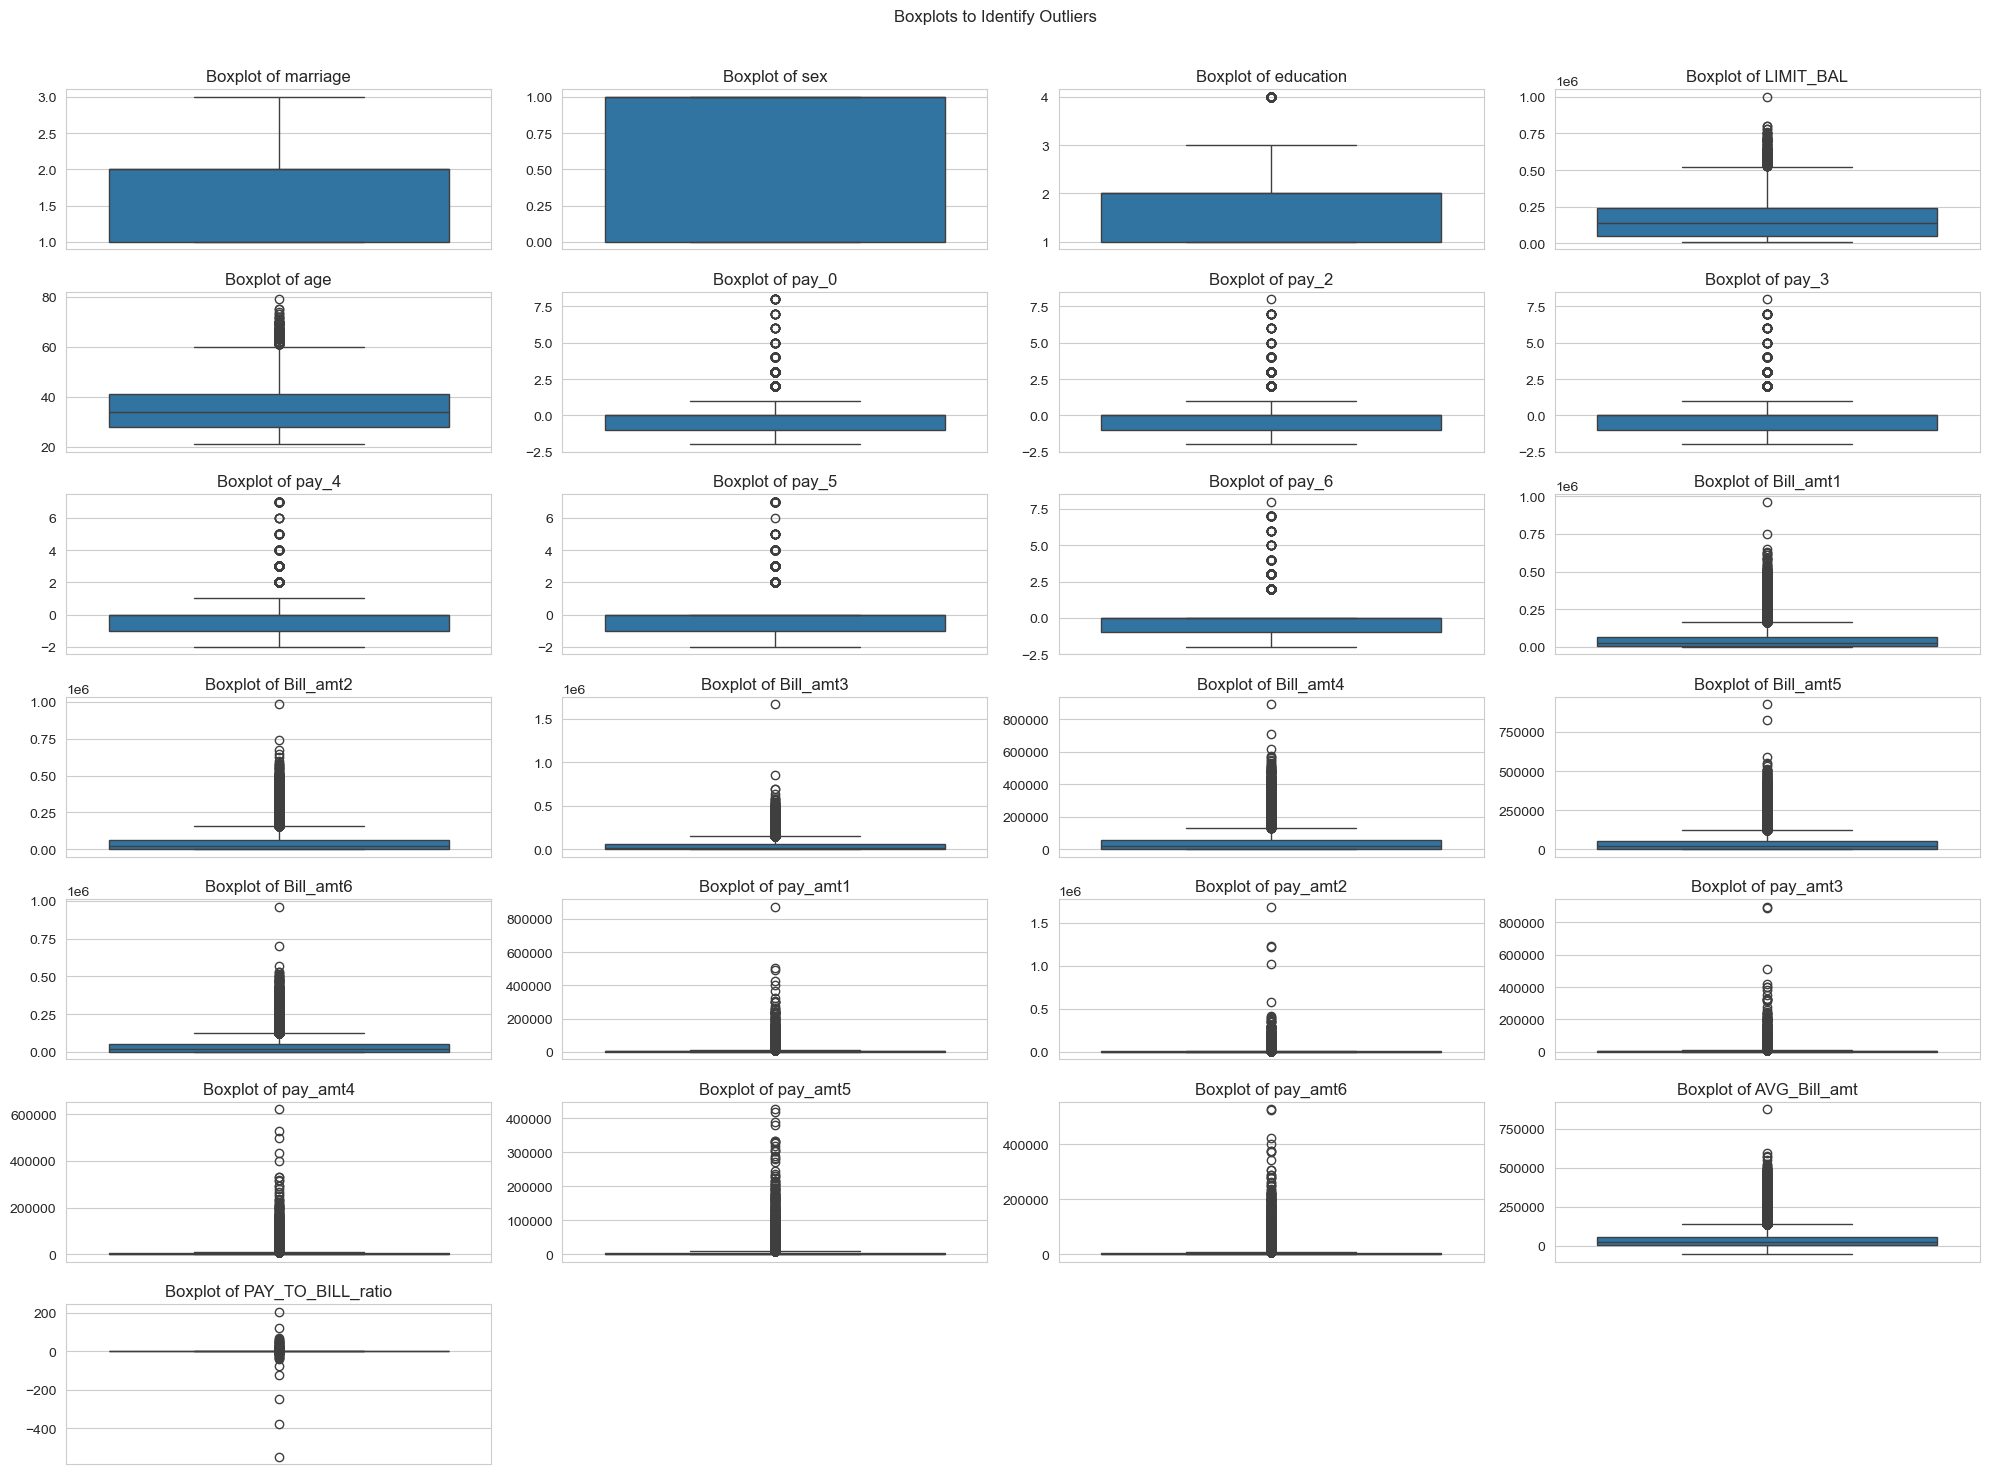

In [139]:
# Plot histograms for all numerical features
features = df.drop(columns=[TARGET_COL]).columns

df[features].hist(bins=30, figsize=(20, 15), layout=(len(features)//4 + 1, 4))
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(len(features)//4 + 1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.suptitle('Boxplots to Identify Outliers')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


--- Comparing Feature Distributions by Target Class ---


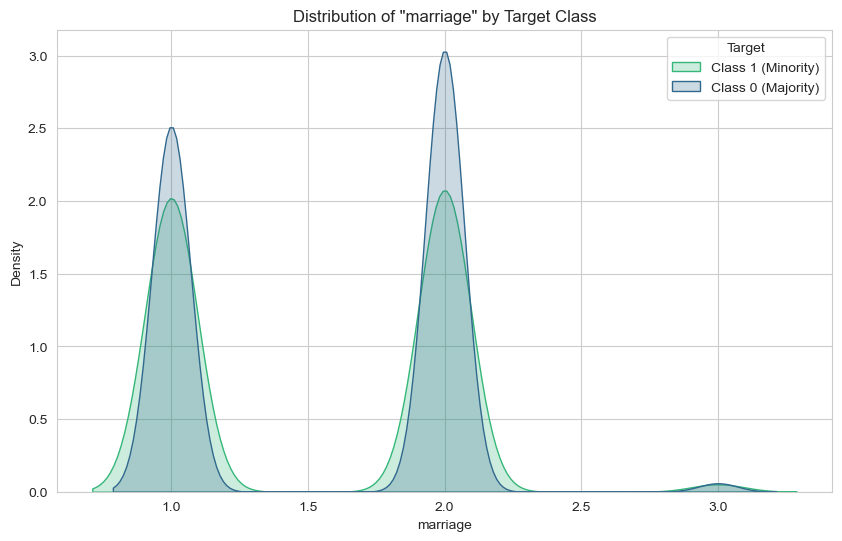

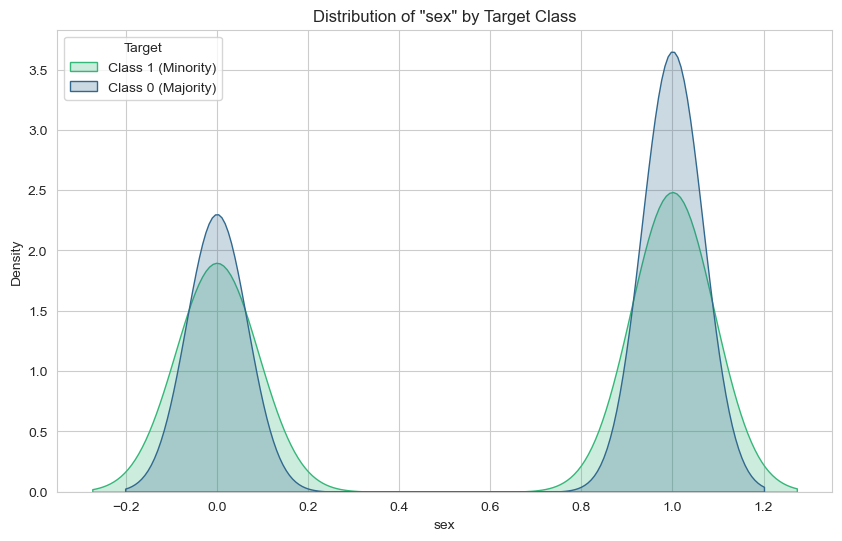

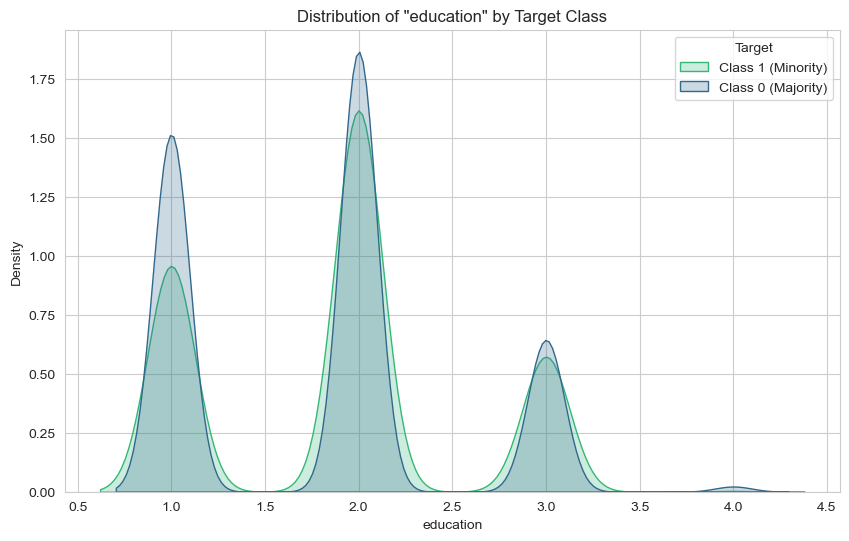

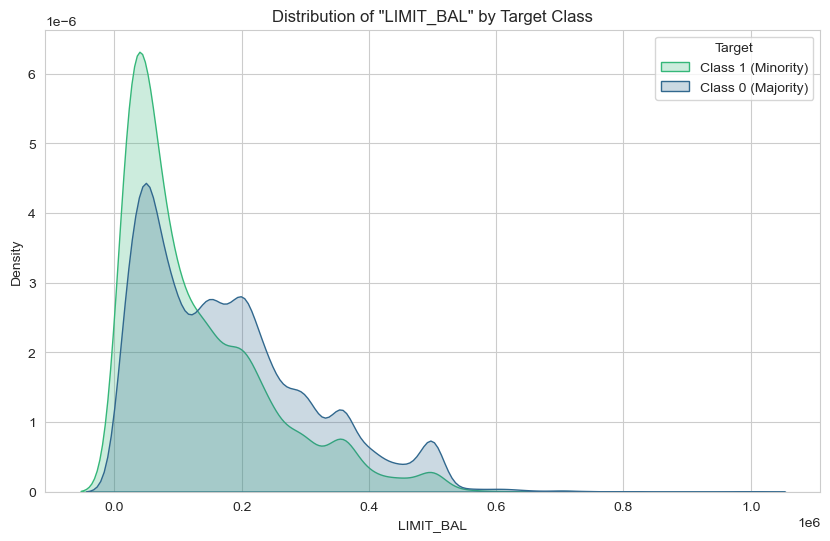

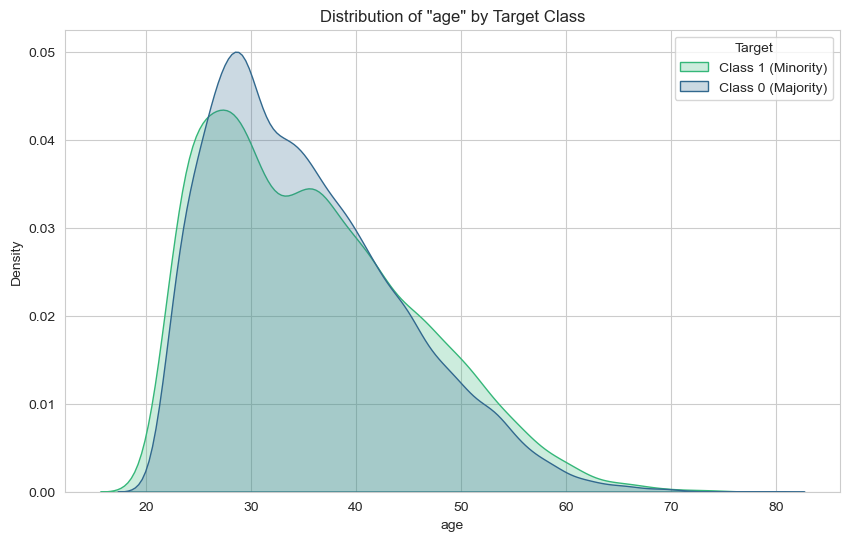

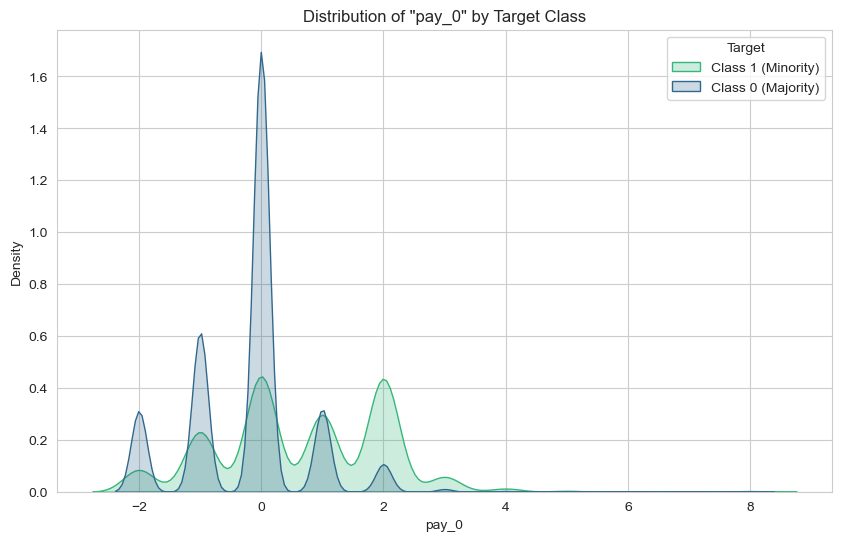

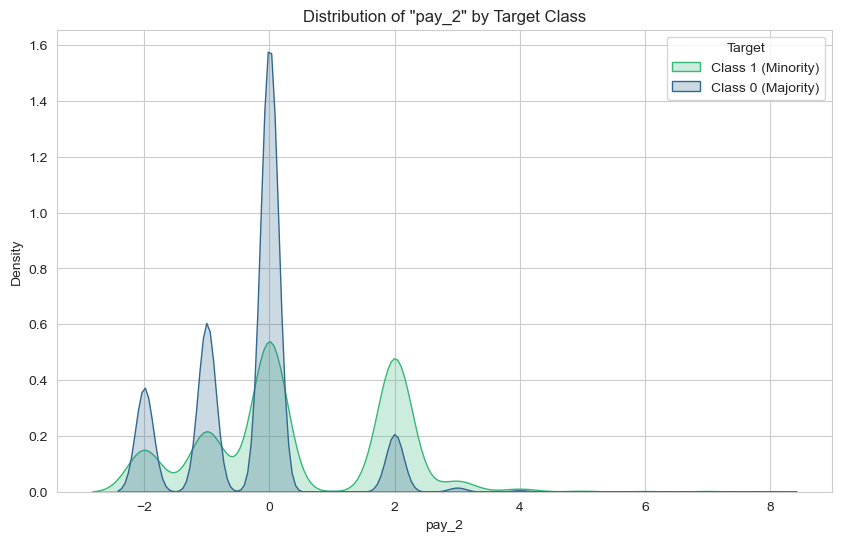

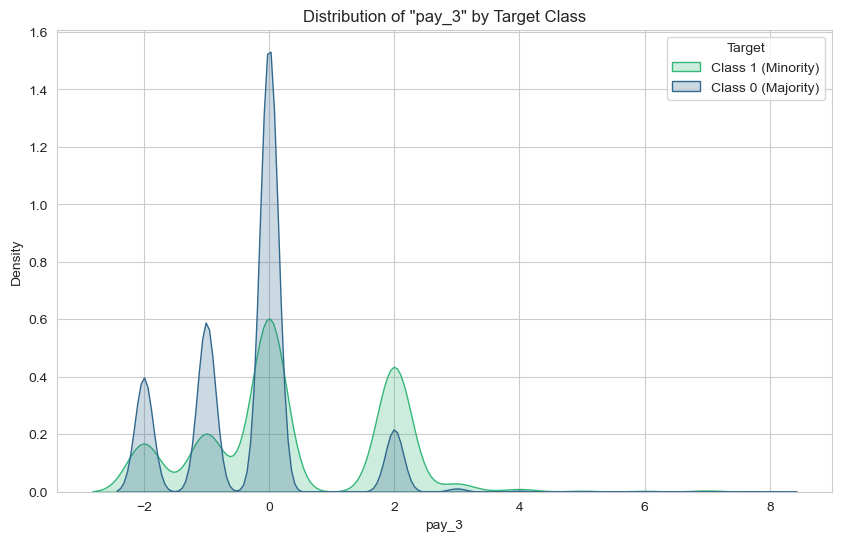

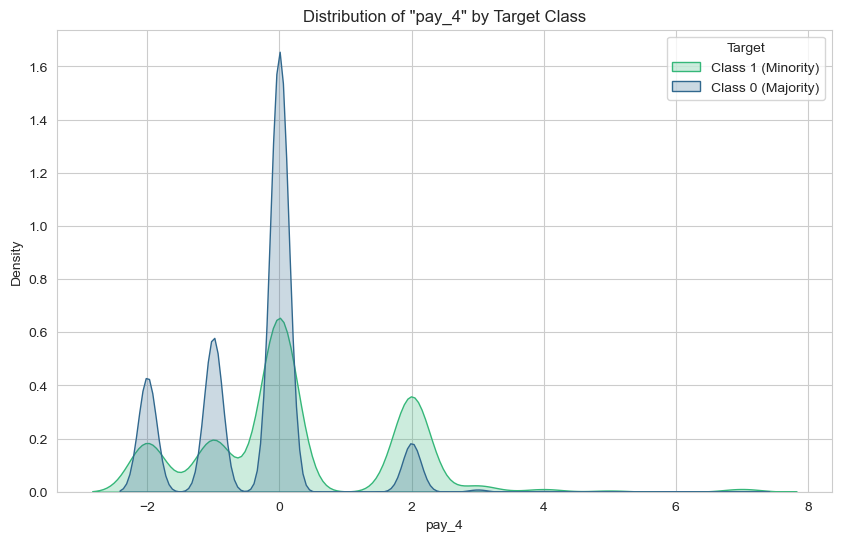

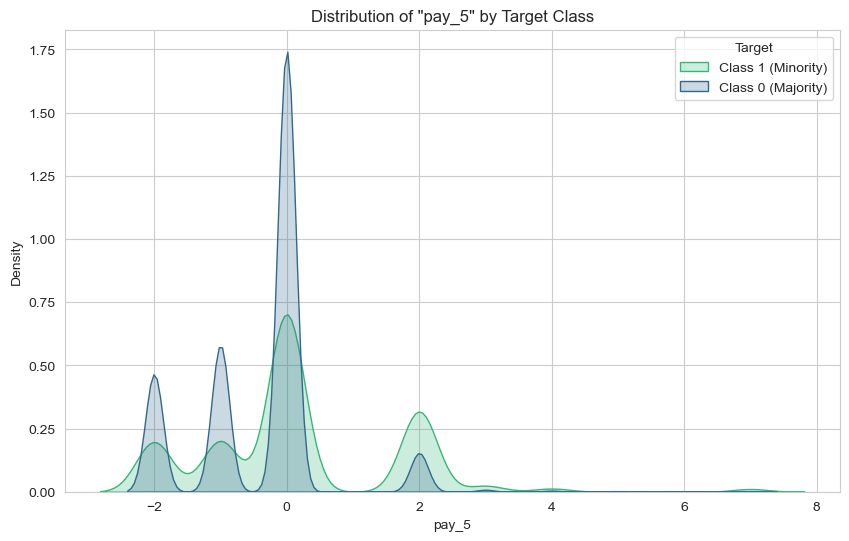

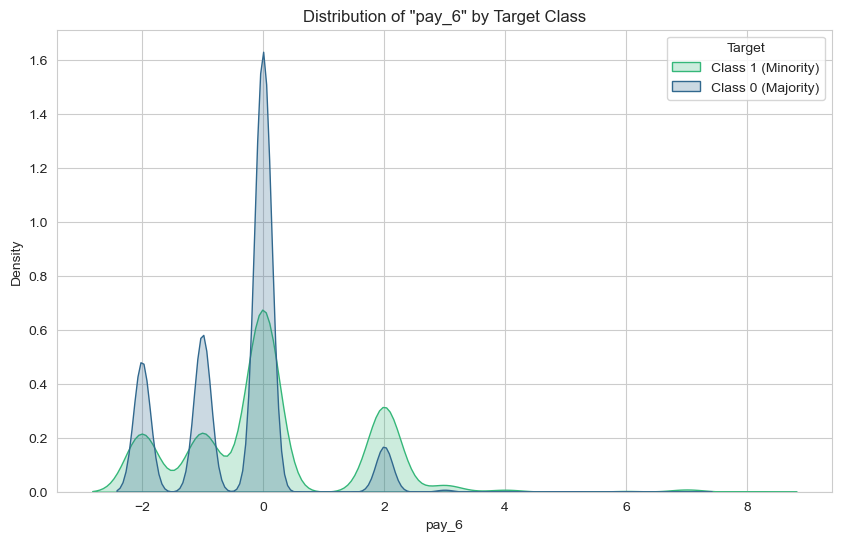

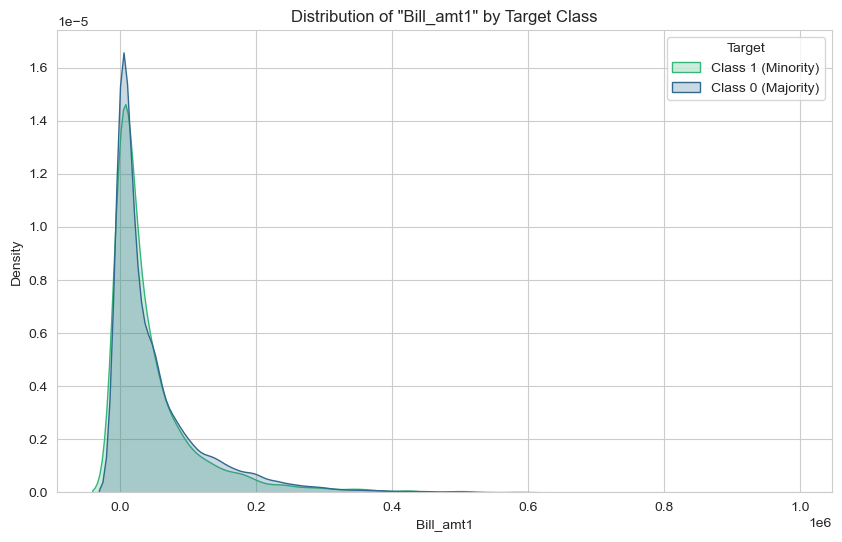

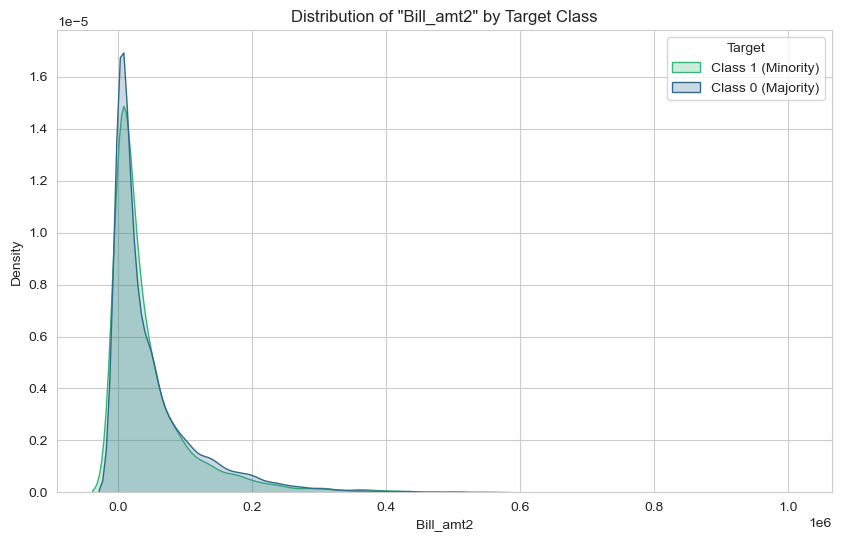

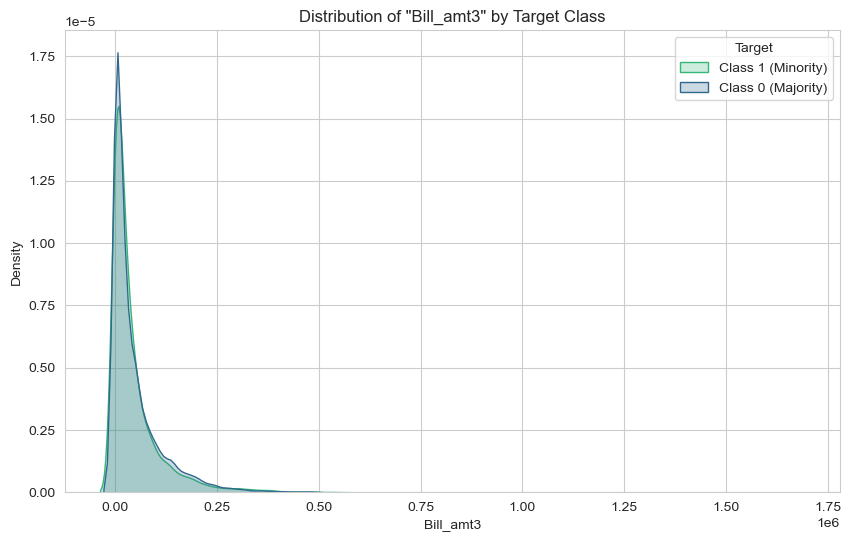

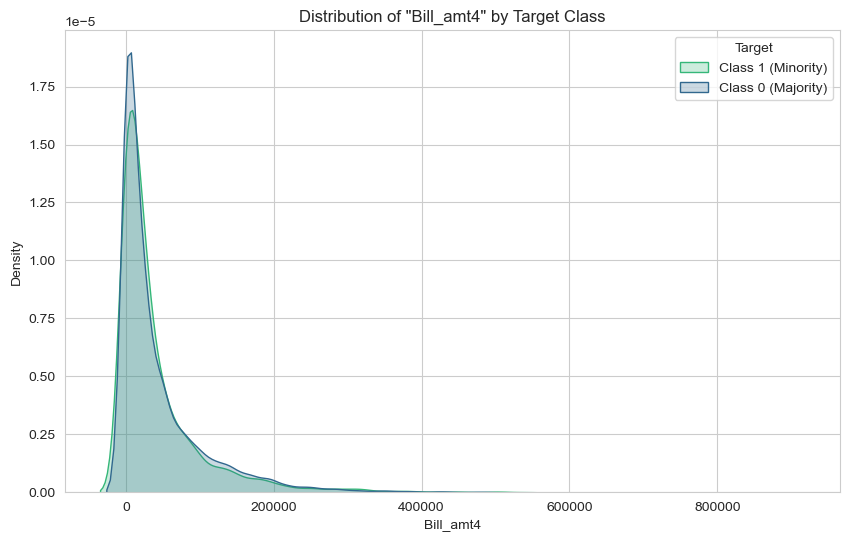

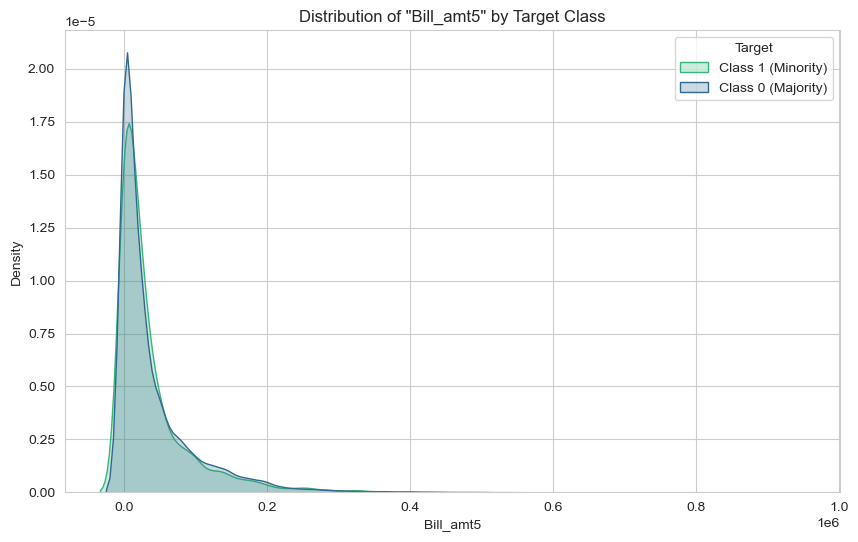

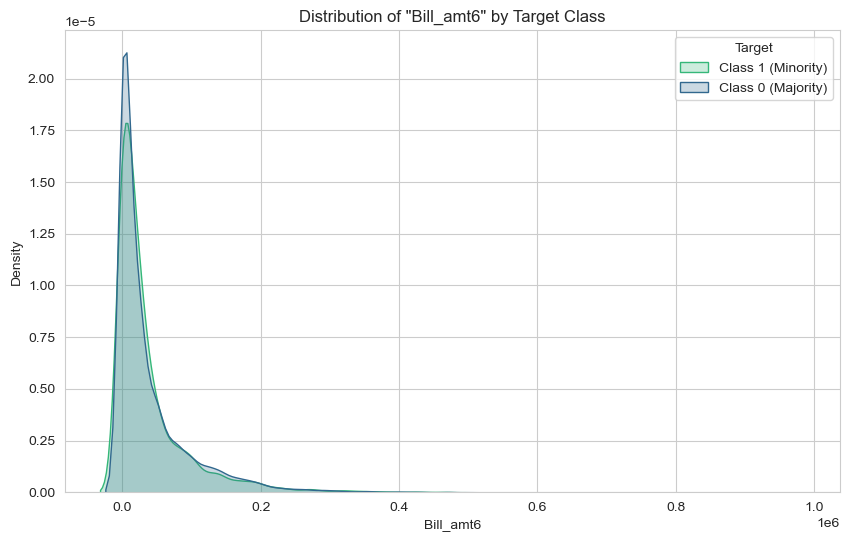

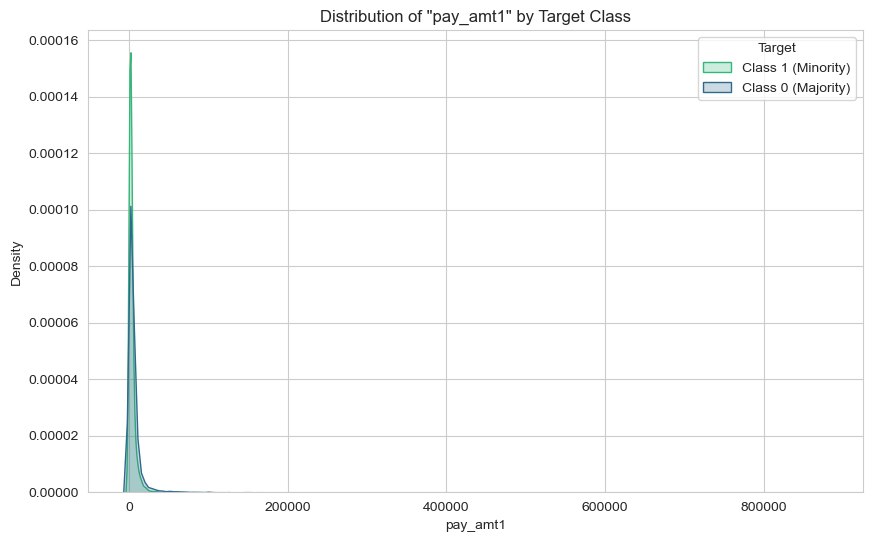

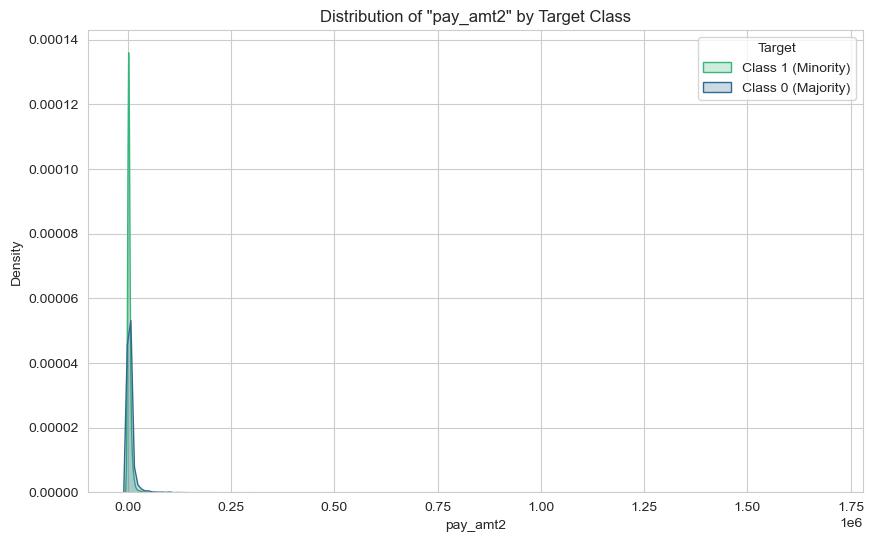

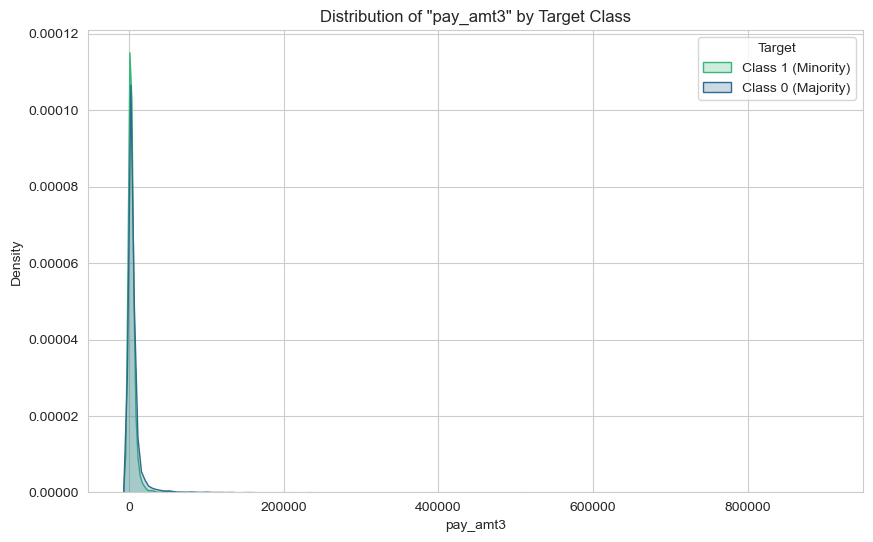

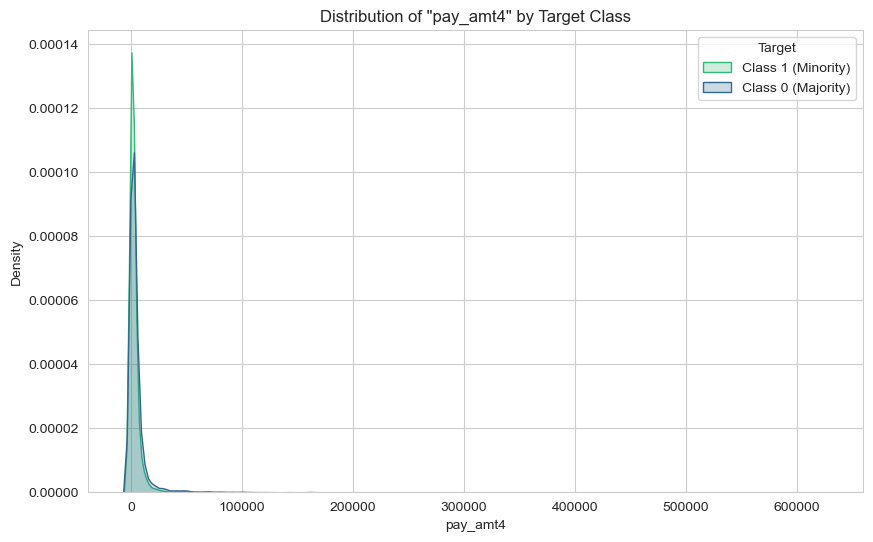

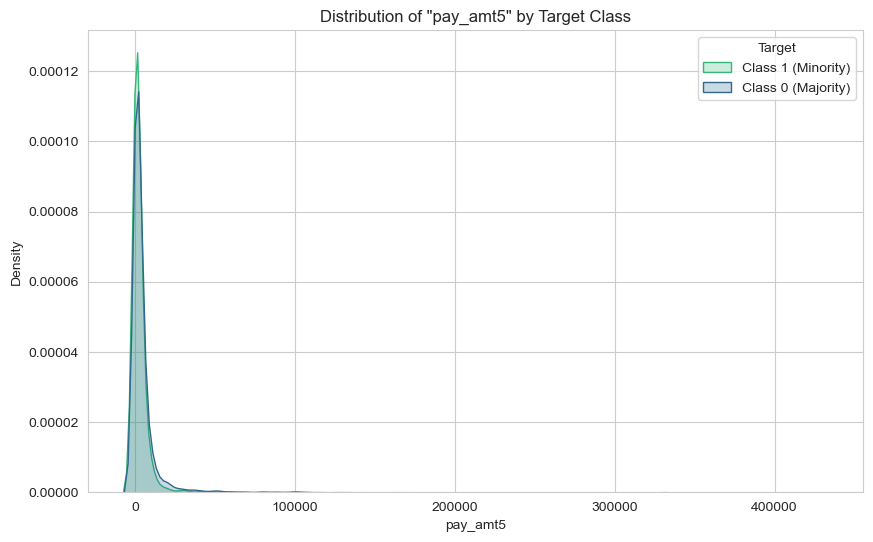

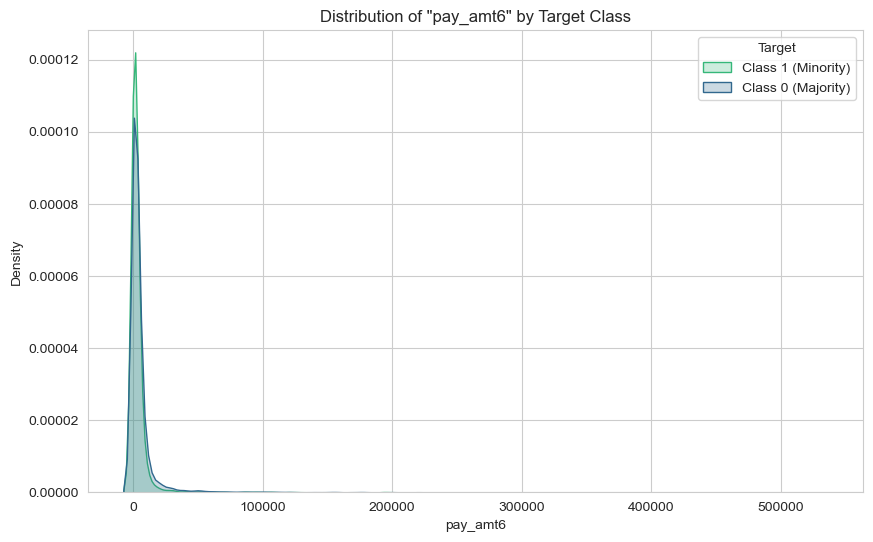

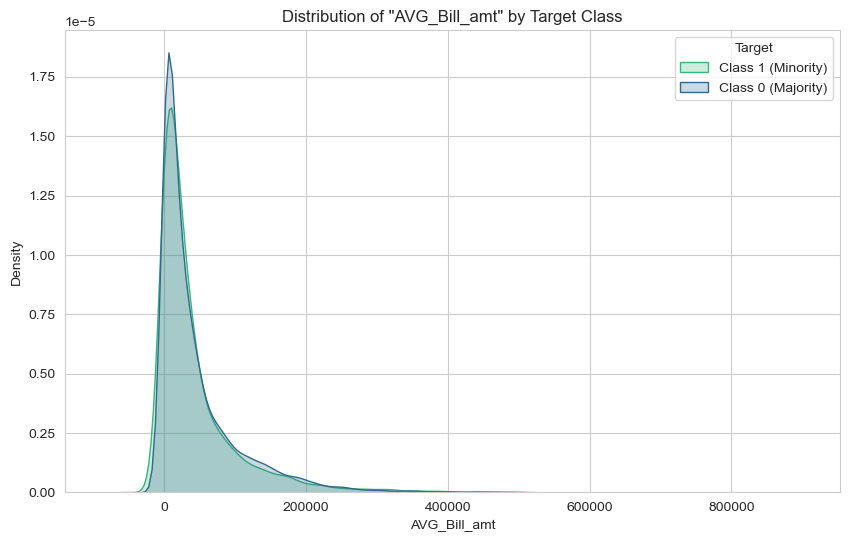

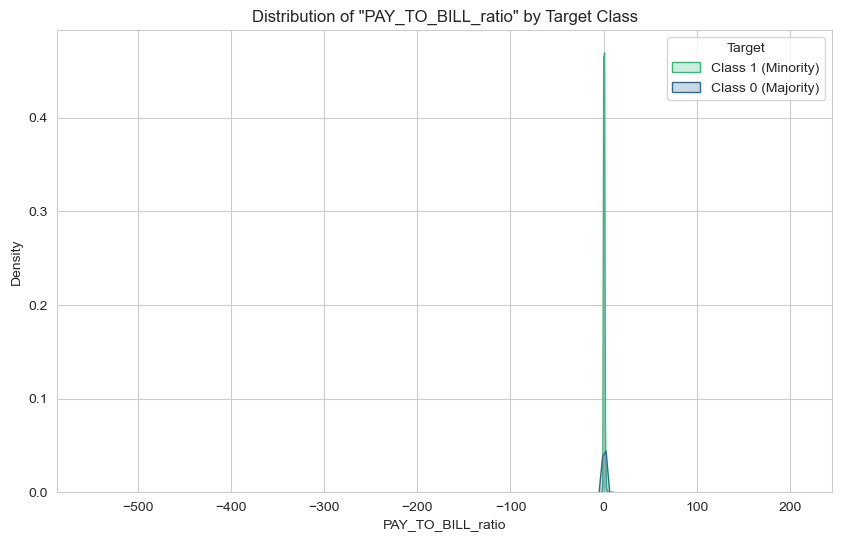

In [140]:
# Let's compare feature distributions for each target class using KDE plots
print("\n--- Comparing Feature Distributions by Target Class ---")

for col in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=col, hue=TARGET_COL, fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of "{col}" by Target Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Target', labels=['Class 1 (Minority)', 'Class 0 (Majority)'])
    plt.show()

C:\Users\lalup\AppData\Local\Temp\ipykernel_7304\2394665370.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_pay_0.index, y=default_rate_by_pay_0.values, ax=ax, palette="viridis")


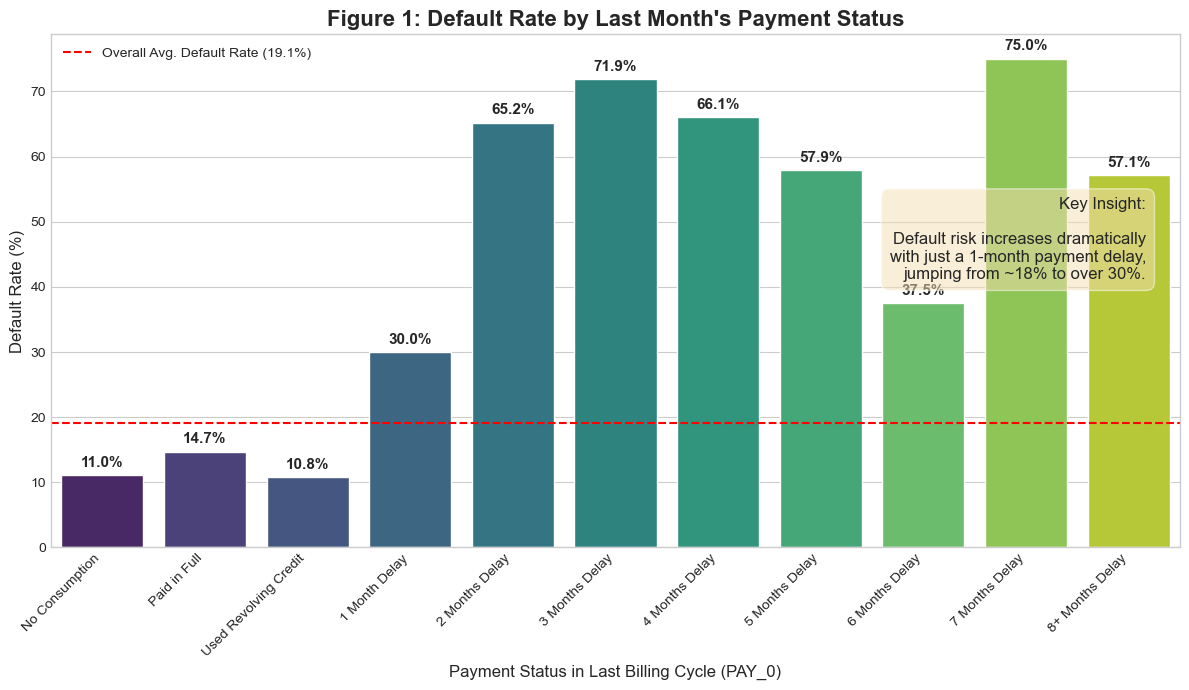

In [225]:
default_rate_by_pay_0 = df.groupby('pay_0')['next_month_default'].mean().sort_index()

default_rate_by_pay_0 = default_rate_by_pay_0 * 100

pay_0_labels_map = {
    -2: 'No Consumption',
    -1: 'Paid in Full',
    0: 'Used Revolving Credit', # Paid minimum
    1: '1 Month Delay',
    2: '2 Months Delay',
    3: '3 Months Delay',
    4: '4 Months Delay',
    5: '5 Months Delay',
    6: '6 Months Delay',
    7: '7 Months Delay',
    8: '8+ Months Delay'
}

default_rate_by_pay_0.index = default_rate_by_pay_0.index.map(pay_0_labels_map)
default_rate_by_pay_0 = default_rate_by_pay_0.dropna()


# --- 3. Create the Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Create the bar plot
sns.barplot(x=default_rate_by_pay_0.index, y=default_rate_by_pay_0.values, ax=ax, palette="viridis")

# Add percentage labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

# Set titles and labels
ax.set_title("Figure 1: Default Rate by Last Month's Payment Status", fontsize=16, fontweight='bold')
ax.set_xlabel("Payment Status in Last Billing Cycle (PAY_0)", fontsize=12)
ax.set_ylabel("Default Rate (%)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a horizontal line for the overall average default rate to provide context
overall_avg_default_rate = df['next_month_default'].mean() * 100
ax.axhline(overall_avg_default_rate, ls='--', color='red', label=f'Overall Avg. Default Rate ({overall_avg_default_rate:.1f}%)')
ax.legend()

ax.text(0.97, 0.6,
        'Key Insight:\n\nDefault risk increases dramatically\nwith just a 1-month payment delay,\njumping from ~18% to over 30%.',
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment='center',
        horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.tight_layout() 
plt.show()

C:\Users\lalup\AppData\Local\Temp\ipykernel_7304\113952326.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilization_default_rate = df.groupby('UTILIZATION_BIN')['next_month_default'].mean() * 100


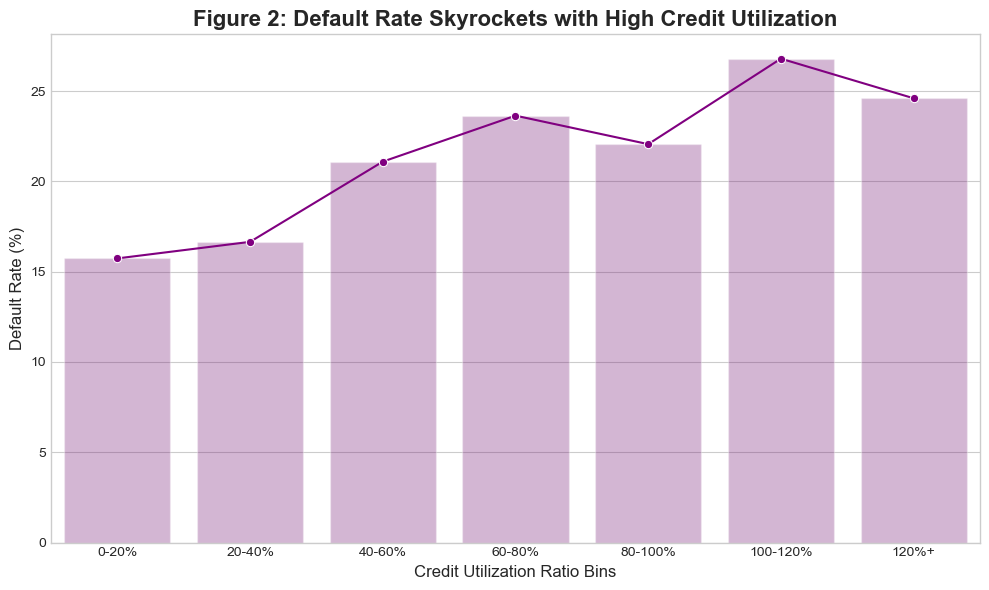

In [227]:
# --- 1. Load Data and Engineer Feature ---
# Make sure to use your pre-cleaned DataFrame 'df'
df['UTILIZATION_RATIO'] = df['Bill_amt1'] / df['LIMIT_BAL']

# Handle cases where LIMIT_BAL is 0 or bill is negative
df['UTILIZATION_RATIO'] = df['UTILIZATION_RATIO'].clip(0, 2) # Cap at 200% to handle outliers

# --- 2. Bin the Data ---
# Create bins for the utilization ratio
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '100-120%', '120%+']
df['UTILIZATION_BIN'] = pd.cut(df['UTILIZATION_RATIO'], bins=bins, labels=labels, right=False)

# --- 3. Calculate Default Rate and Plot ---
utilization_default_rate = df.groupby('UTILIZATION_BIN')['next_month_default'].mean() * 100

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=utilization_default_rate.index, y=utilization_default_rate.values, marker='o', ax=ax, color='purple')
sns.barplot(x=utilization_default_rate.index, y=utilization_default_rate.values, ax=ax, alpha=0.3, color='purple')

ax.set_title("Figure 2: Default Rate Skyrockets with High Credit Utilization", fontsize=16, fontweight='bold')
ax.set_xlabel("Credit Utilization Ratio Bins", fontsize=12)
ax.set_ylabel("Default Rate (%)", fontsize=12)
plt.tight_layout()
plt.show()

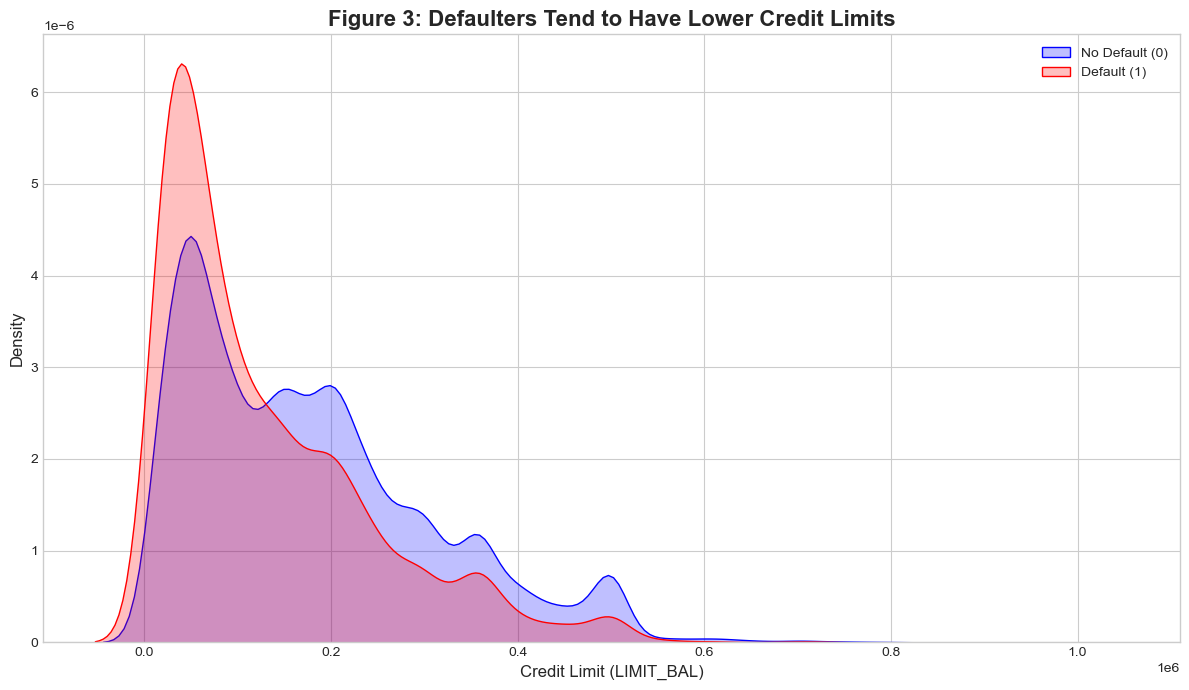

In [228]:

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

sns.kdeplot(df.loc[df['next_month_default'] == 0, 'LIMIT_BAL'], 
            label='No Default (0)', color='blue', fill=True, ax=ax)
sns.kdeplot(df.loc[df['next_month_default'] == 1, 'LIMIT_BAL'], 
            label='Default (1)', color='red', fill=True, ax=ax)

ax.set_title("Figure 3: Defaulters Tend to Have Lower Credit Limits", fontsize=16, fontweight='bold')
ax.set_xlabel("Credit Limit (LIMIT_BAL)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

# DATA SPLITING 

In [141]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [142]:
X.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,2,0,2,60000,25.0,2,2,2,0,0,...,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27
2,1,0,2,180000,63.0,0,0,0,0,0,...,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04
3,1,1,2,210000,43.0,0,0,0,0,0,...,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72


In [143]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size=0.3,random_state=45,stratify=Y)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# UPSAMPLING 
Since our dataset is highly imbalanced, I am using SMOTE to upsample the minority class in the target variable to achieve balance.

In [145]:
import imblearn
import joblib 
from imblearn.over_sampling import SMOTE

In [146]:
smote = SMOTE(random_state=45)
X_train_rs, Y_train_rs  = smote.fit_resample(X_train_scaled,Y_train)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [147]:
print(Y_train_rs.value_counts(normalize=True))

next_month_default
0    0.5
1    0.5
Name: proportion, dtype: float64


# Model Training

In [262]:
import tensorflow  as tf 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#### NEURAL NETWORK 

In [263]:
NN  = Sequential([
    Dense(1024,activation = 'relu',input_shape  = (X_train_rs.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1,activation='sigmoid')
])

c:\anakonda\envs\spyder_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [264]:
NN.compile(optimizer=Adam(learning_rate = 1e-4),loss='binary_crossentropy',metrics =['accuracy'])

In [265]:
history = NN.fit(X_train_rs,Y_train_rs,epochs=20,batch_size=32, validation_data=(X_test_scaled,Y_test),verbose =1)

Epoch 1/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5914 - loss: 0.7907 - val_accuracy: 0.7886 - val_loss: 0.5051
Epoch 2/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6339 - loss: 0.6941 - val_accuracy: 0.7635 - val_loss: 0.5391
Epoch 3/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6313 - loss: 0.6727 - val_accuracy: 0.7628 - val_loss: 0.5636
Epoch 4/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6633 - loss: 0.6295 - val_accuracy: 0.7498 - val_loss: 0.5555
Epoch 5/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6572 - loss: 0.6261 - val_accuracy: 0.8065 - val_loss: 0.5180
Epoch 6/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6673 - loss: 0.6163 - val_accuracy: 0.7321 - val_loss: 0.5641
Epoch 7/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6810 - loss: 0.5973 - val_accuracy: 0.7023 - val_loss: 0.5827
Epoch 8/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6861 - loss: 0.5831 - v

### LogisticRegression

In [266]:
LR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                         intercept_scaling=1, class_weight=None, random_state=45, solver='lbfgs',
                           max_iter=100, multi_class='deprecated', verbose=1, warm_start=False, n_jobs=None, l1_ratio=None)

# Train model
LR_history = LR.fit(X_train_rs,Y_train_rs)


### Decision Tree

In [267]:
dt = DecisionTreeClassifier(random_state=45)
dt.fit(X_train_rs,Y_train_rs)

DecisionTreeClassifier(random_state=45)

### XGBoost

In [268]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_rs,Y_train_rs)


c:\anakonda\envs\spyder_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### LightGBM

In [269]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_rs,Y_train_rs)

[LightGBM] [Info] Number of positive: 14201, number of negative: 14201
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6129
[LightGBM] [Info] Number of data points in the train set: 28402, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [270]:
MLP = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=45)
MLP.fit(X_train_rs,Y_train_rs)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=45)

### comparision 

In [272]:
models = {
    "Logistic Regression": LR,
    "Decision Tree": dt,
    "LightGBM": lgbm,
    "multilayerperceptron": MLP
}

for name, model in models.items():
    print(f"\n==== {name} ====")
    y_pred = model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
    print("Classification Report:\n", classification_report(Y_test, y_pred))



==== Logistic Regression ====
Accuracy: 0.680893498205026
Confusion Matrix:
 [[4210 1877]
 [ 523  911]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      6087
           1       0.33      0.64      0.43      1434

    accuracy                           0.68      7521
   macro avg       0.61      0.66      0.60      7521
weighted avg       0.78      0.68      0.71      7521


==== Decision Tree ====
Accuracy: 0.5236005850285866
Confusion Matrix:
 [[2853 3234]
 [ 349 1085]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.47      0.61      6087
           1       0.25      0.76      0.38      1434

    accuracy                           0.52      7521
   macro avg       0.57      0.61      0.50      7521
weighted avg       0.77      0.52      0.57      7521


==== LightGBM ====
Accuracy: 0.19638345964632362
Confusion Matrix:
 [[  46 6041]
 [   3 1431

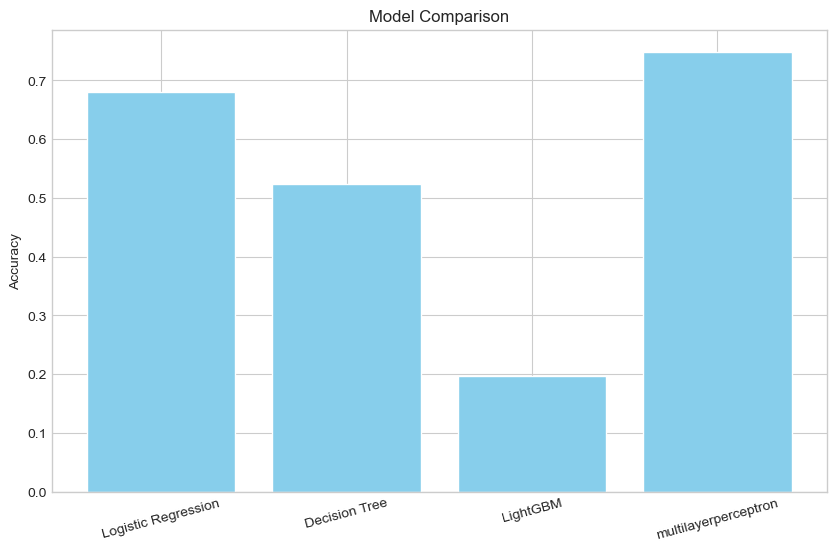

In [273]:
import matplotlib.pyplot as plt

accuracy_scores = {name: accuracy_score(Y_test, model.predict(X_test_scaled)) for name, model in models.items()}
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=15)
plt.show()


# Model Evaluation

In [274]:
y_pred_prob = NN.predict(X_test_scaled)
y_pred = (y_pred_prob>=0.33).astype(int)

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [275]:
print(f'accuracy: {accuracy_score(Y_test,y_pred):.4f}')

accuracy: 0.5082


In [276]:
print(confusion_matrix(Y_test,y_pred))

[[2608 3479]
 [ 220 1214]]


In [277]:
print(f"classification_report :{classification_report(Y_test,y_pred)}")

classification_report :              precision    recall  f1-score   support

           0       0.92      0.43      0.59      6087
           1       0.26      0.85      0.40      1434

    accuracy                           0.51      7521
   macro avg       0.59      0.64      0.49      7521
weighted avg       0.80      0.51      0.55      7521



In [278]:
f2_score =fbeta_score(Y_test,y_pred, beta=2,average='binary')
print(f"F2-score: {f2_score:.4f}")

F2-score: 0.5820


In [279]:
from sklearn.metrics import precision_recall_fscore_support, fbeta_score

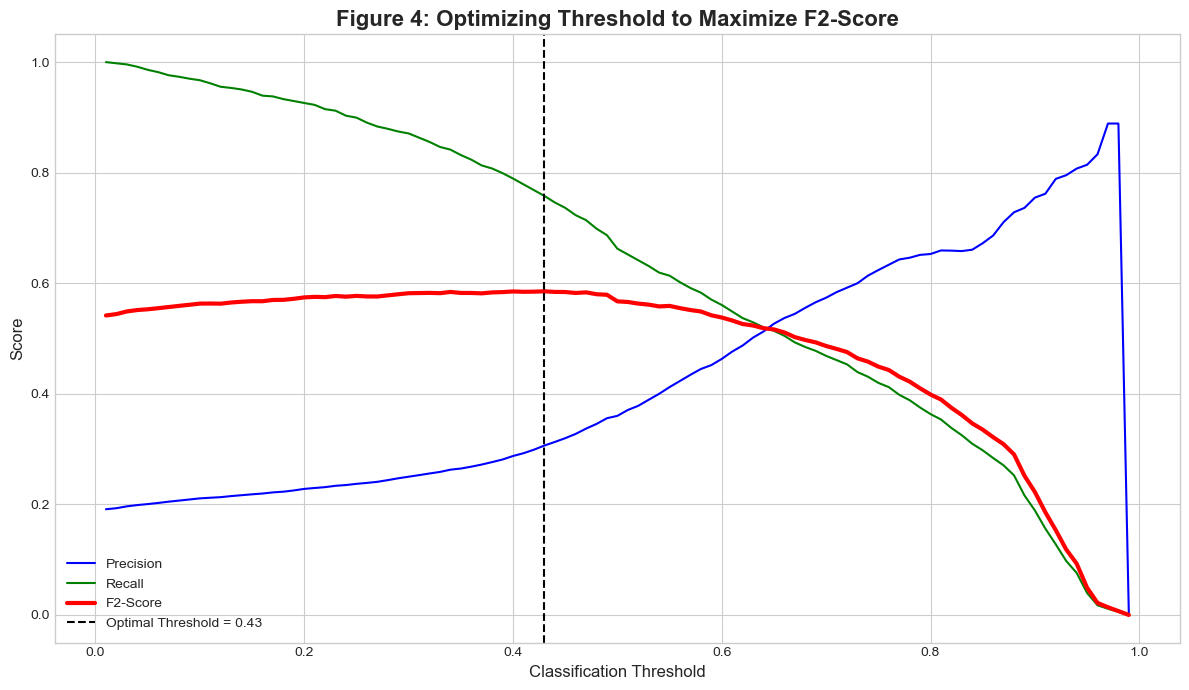

In [280]:
thresholds = np.arange(0.01, 1.0, 0.01)
precisions, recalls, f2_scores = [], [], []

for t in thresholds:
    preds = (y_pred_prob >= t).astype(int)
    p, r, _, _ = precision_recall_fscore_support(Y_test, preds, average='binary', zero_division=0)
    f2 = fbeta_score(Y_test, preds, beta=2, zero_division=0)
    precisions.append(p)
    recalls.append(r)
    f2_scores.append(f2)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(thresholds, precisions, label='Precision', color='blue')
ax.plot(thresholds, recalls, label='Recall', color='green')
ax.plot(thresholds, f2_scores, label='F2-Score', color='red', linewidth=3)

# Find optimal threshold and plot a vertical line
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]
ax.axvline(optimal_threshold, color='black', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')

ax.set_title('Figure 4: Optimizing Threshold to Maximize F2-Score', fontsize=16, fontweight='bold')
ax.set_xlabel('Classification Threshold', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()


# Prediction on Validation Data

In [163]:
# --- Input Files ---  
SCALER_PATH = 'scaler.pkl'       
VALIDATION_DATA_PATH = r'c:\Users\lalup\Downloads\Datasets_final\validate_dataset_final.csv' 

# --- Output File ---
OUTPUT_PATH = 'submission_23125028.csv'       

# --- Column Names ---
CUSTOMER_ID_COLUMN = 'Customer_ID'
FEATURE_COLUMNS = X.columns.tolist()


In [164]:

try:
    model = NN
    scaler = joblib.load(SCALER_PATH)
    val_df = pd.read_csv(VALIDATION_DATA_PATH)

except FileNotFoundError as e:
    print(f"Error: Could not find a required file. {e}")
    print("Please make sure MODEL_PATH, SCALER_PATH, and VALIDATION_DATA_PATH are correct.")
    exit()

print("All files loaded successfully.")


All files loaded successfully.


In [165]:
Customer_ID = val_df[CUSTOMER_ID_COLUMN]


try:
    X_val = val_df[FEATURE_COLUMNS]
except KeyError as e:
    print(f"Error: A feature column is missing from your validation data. {e}")
    print("Please check that all columns in FEATURE_COLUMNS exist in your CSV.")
    exit()

# Apply the SAME scaling transformation using the loaded scaler
# We use .transform(), NOT .fit_transform(), as we're applying the learned scale
X_val_scaled = scaler.transform(X_val)

print("Data has been scaled and is ready for the model.")


Data has been scaled and is ready for the model.


In [166]:
predicted_probabilities = model.predict(X_val_scaled)

# Convert probabilities to final class labels (0 or 1)
predicted_classes = (predicted_probabilities > 0.3).astype(int)
predicted_classes_flat = predicted_classes.flatten()

print("Predictions generated.")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions generated.


In [167]:

output_directory = r'c:\Users\lalup\Downloads\Datasets_final'

filename = 'submission_23125028.csv'
os.makedirs(output_directory, exist_ok=True)

full_output_path = os.path.join(output_directory, filename)


# Create a new DataFrame with the customer IDs and their predicted values
results_df = pd.DataFrame({
    CUSTOMER_ID_COLUMN: Customer_ID,
    'next_month_default( 0 or 1 )': predicted_classes_flat
})

# Save the results DataFrame to the full path
results_df.to_csv(full_output_path, index=False)

print(f"\nSuccess! Predictions have been saved to '{full_output_path}'")
print(results_df.head())


Success! Predictions have been saved to 'c:\Users\lalup\Downloads\Datasets_final\submission_23125028.csv'
   Customer_ID  next_month_default( 0 or 1 )
0            1                             0
1            2                             0
2            3                             1
3            4                             1
4            5                             0
